In [68]:
import librosa
import numpy as np
import IPython
import pandas as pd
import sys
import os 
import warnings
import time

#we will see it later.
import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

import np_utils

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#importing librarys

In [69]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets

# to play the audio files
from IPython.display import Audio

from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical


In [70]:
import os
import pandas as pd

In [71]:
cwd = os.getcwd()
print(cwd)
os.chdir('/Users/zeyuanli/Dropbox/Github/Librosa test'+'/AudioWAV')
#change the directory to AudioMP3

/Users/zeyuanli/Dropbox/Github/Librosa test/AudioWAV


In [72]:
#Use this to read from CSV directly
Features = pd.read_csv("features.csv")

In [73]:
X = Features.iloc[: ,:-3].values
Y = Features['labels'].values
#only call this for CNN # As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [74]:
Y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [75]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 160), (16744, 6), (5582, 160), (5582, 6))

In [84]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 160), (16744, 6), (5582, 160), (5582, 6))

In [77]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score #computes F1 score
from sklearn.metrics import accuracy_score #compute accuracy

In [78]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='Tre'

In [79]:
def mlp ():
    model = Sequential ()
    model.add(Dense(units = 1600, input_shape = (x_train.shape[1],), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 100, activation = 'relu'))
    model.add(Dropout(0.34))
    model.add(Dense(units = 20, activation = 'relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(units = 6, activation = 'softmax'))
    
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

    model.summary()
    
    return model

In [80]:
mlp_model = mlp()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1600)              257600    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               160100    
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 126       
Total params: 419,846
Trainable params: 419,846
Non-trainable params: 0
________________________________________________

In [81]:
#rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.4, verbose=1, patience=2, min_lr=0.00001)
mlp_history = mlp_model.fit(x_train,y_train, epochs = 268, batch_size = 2000, verbose = 1, validation_split = 0.2)#,callbacks = [rlrp])

Epoch 1/268
1/7 [===>..........................] - ETA: 1s - loss: 1.9421 - accuracy: 0.1520

2021-12-10 00:37:33.384584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.7247 - accuracy: 0.2585 - val_loss: 1.5992 - val_accuracy: 0.3308
Epoch 2/268
7/7 [==============================] - 0s 14ms/step - loss: 1.6084 - accuracy: 0.3186 - val_loss: 1.5368 - val_accuracy: 0.3649
Epoch 3/268
1/7 [===>..........................] - ETA: 0s - loss: 1.5816 - accuracy: 0.3400

2021-12-10 00:37:33.706801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 14ms/step - loss: 1.5540 - accuracy: 0.3524 - val_loss: 1.4909 - val_accuracy: 0.3992
Epoch 4/268
7/7 [==============================] - 0s 15ms/step - loss: 1.5070 - accuracy: 0.3795 - val_loss: 1.4444 - val_accuracy: 0.4180
Epoch 5/268
7/7 [==============================] - 0s 15ms/step - loss: 1.4645 - accuracy: 0.4001 - val_loss: 1.4100 - val_accuracy: 0.4371
Epoch 6/268
7/7 [==============================] - 0s 17ms/step - loss: 1.4368 - accuracy: 0.4156 - val_loss: 1.3871 - val_accuracy: 0.4479
Epoch 7/268
7/7 [==============================] - 0s 16ms/step - loss: 1.4160 - accuracy: 0.4252 - val_loss: 1.3683 - val_accuracy: 0.4482
Epoch 8/268
7/7 [==============================] - 0s 14ms/step - loss: 1.3968 - accuracy: 0.4297 - val_loss: 1.3543 - val_accuracy: 0.4583
Epoch 9/268
7/7 [==============================] - 0s 18ms/step - loss: 1.3745 - accuracy: 0.4369 - val_loss: 1.3396 - val_accuracy: 0.4631
Epoch 10/268
7/7 [==============

7/7 [==============================] - 0s 15ms/step - loss: 0.9511 - accuracy: 0.6324 - val_loss: 1.1327 - val_accuracy: 0.5614
Epoch 62/268
7/7 [==============================] - 0s 14ms/step - loss: 0.9524 - accuracy: 0.6257 - val_loss: 1.1304 - val_accuracy: 0.5596
Epoch 63/268
7/7 [==============================] - 0s 15ms/step - loss: 0.9449 - accuracy: 0.6340 - val_loss: 1.1377 - val_accuracy: 0.5539
Epoch 64/268
7/7 [==============================] - 0s 14ms/step - loss: 0.9341 - accuracy: 0.6357 - val_loss: 1.1291 - val_accuracy: 0.5629
Epoch 65/268
7/7 [==============================] - 0s 14ms/step - loss: 0.9305 - accuracy: 0.6414 - val_loss: 1.1259 - val_accuracy: 0.5652
Epoch 66/268
7/7 [==============================] - 0s 15ms/step - loss: 0.9207 - accuracy: 0.6429 - val_loss: 1.1184 - val_accuracy: 0.5623
Epoch 67/268
7/7 [==============================] - 0s 14ms/step - loss: 0.9202 - accuracy: 0.6432 - val_loss: 1.1174 - val_accuracy: 0.5670
Epoch 68/268
7/7 [========

7/7 [==============================] - 0s 14ms/step - loss: 0.6999 - accuracy: 0.7352 - val_loss: 1.1055 - val_accuracy: 0.5975
Epoch 120/268
7/7 [==============================] - 0s 15ms/step - loss: 0.6972 - accuracy: 0.7375 - val_loss: 1.1110 - val_accuracy: 0.5972
Epoch 121/268
7/7 [==============================] - 0s 15ms/step - loss: 0.6877 - accuracy: 0.7404 - val_loss: 1.1165 - val_accuracy: 0.6059
Epoch 122/268
7/7 [==============================] - 0s 18ms/step - loss: 0.6873 - accuracy: 0.7392 - val_loss: 1.1066 - val_accuracy: 0.6038
Epoch 123/268
7/7 [==============================] - 0s 13ms/step - loss: 0.6723 - accuracy: 0.7466 - val_loss: 1.1076 - val_accuracy: 0.5981
Epoch 124/268
7/7 [==============================] - 0s 16ms/step - loss: 0.6830 - accuracy: 0.7409 - val_loss: 1.1049 - val_accuracy: 0.6020
Epoch 125/268
7/7 [==============================] - 0s 14ms/step - loss: 0.6780 - accuracy: 0.7406 - val_loss: 1.1188 - val_accuracy: 0.6053
Epoch 126/268
7/7 [=

Epoch 177/268
7/7 [==============================] - 0s 14ms/step - loss: 0.5310 - accuracy: 0.8025 - val_loss: 1.1462 - val_accuracy: 0.6214
Epoch 178/268
7/7 [==============================] - 0s 15ms/step - loss: 0.5401 - accuracy: 0.8026 - val_loss: 1.1336 - val_accuracy: 0.6184
Epoch 179/268
7/7 [==============================] - 0s 14ms/step - loss: 0.5378 - accuracy: 0.8004 - val_loss: 1.1400 - val_accuracy: 0.6229
Epoch 180/268
7/7 [==============================] - 0s 15ms/step - loss: 0.5386 - accuracy: 0.7973 - val_loss: 1.1432 - val_accuracy: 0.6208
Epoch 181/268
7/7 [==============================] - 0s 14ms/step - loss: 0.5261 - accuracy: 0.8054 - val_loss: 1.1445 - val_accuracy: 0.6220
Epoch 182/268
7/7 [==============================] - 0s 14ms/step - loss: 0.5170 - accuracy: 0.8052 - val_loss: 1.1676 - val_accuracy: 0.6256
Epoch 183/268
7/7 [==============================] - 0s 14ms/step - loss: 0.5154 - accuracy: 0.8009 - val_loss: 1.1646 - val_accuracy: 0.6166
Epoch 

Epoch 235/268
7/7 [==============================] - 0s 15ms/step - loss: 0.4361 - accuracy: 0.8379 - val_loss: 1.1909 - val_accuracy: 0.6279
Epoch 236/268
7/7 [==============================] - 0s 14ms/step - loss: 0.4385 - accuracy: 0.8346 - val_loss: 1.1860 - val_accuracy: 0.6318
Epoch 237/268
7/7 [==============================] - 0s 14ms/step - loss: 0.4343 - accuracy: 0.8391 - val_loss: 1.2060 - val_accuracy: 0.6262
Epoch 238/268
7/7 [==============================] - 0s 14ms/step - loss: 0.4349 - accuracy: 0.8408 - val_loss: 1.1890 - val_accuracy: 0.6309
Epoch 239/268
7/7 [==============================] - 0s 14ms/step - loss: 0.4346 - accuracy: 0.8354 - val_loss: 1.1812 - val_accuracy: 0.6300
Epoch 240/268
7/7 [==============================] - 0s 14ms/step - loss: 0.4243 - accuracy: 0.8454 - val_loss: 1.2000 - val_accuracy: 0.6265
Epoch 241/268
7/7 [==============================] - 0s 14ms/step - loss: 0.4265 - accuracy: 0.8405 - val_loss: 1.1919 - val_accuracy: 0.6333
Epoch 

In [82]:
mlp_model.evaluate(x_test,y_test)

175/175 [==============================] - 1s 5ms/step - loss: 1.2292 - accuracy: 0.6281


[1.2291666269302368, 0.6280903220176697]

2021-12-10 00:34:33.945759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


accuracy score for Train set is: 0.9056378404204491
accuracy score for Test set is:  0.6277319957004658
[Anger, disgust, fear, happy, neutral, sad]
F1 score for Train set is: [0.9434555  0.89778413 0.89009793 0.9139445  0.89767534 0.88971458]
F1 score for Test set is:  [0.76851372 0.54525386 0.55323944 0.61410788 0.59201906 0.67484061]


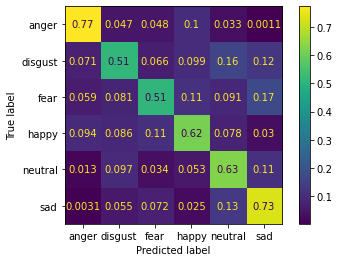

In [63]:
pred = mlp_model.predict(x_train)
pred_test = mlp_model.predict(x_test)

print("accuracy score for Train set is:", accuracy_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1)))
print("accuracy score for Test set is: ", accuracy_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1)))
print("[Anger, disgust, fear, happy, neutral, sad]")
print("F1 score for Train set is:", f1_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1), average = None))
print("F1 score for Test set is: ", f1_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1), average = None))
labels = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad']
cm = confusion_matrix(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1))
cm = cm/ cm.astype(np.float64).sum(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [92]:
Features_erica = pd.read_csv("features_erica.csv")

y_erica=[]
x_erica = Features_erica.iloc[:,:-3].values

x_erica = scaler.fit_transform (x_erica)

y_erica[0:3] = [0] *3
y_erica[3:6] = [3] *3
y_erica[6:9] = [0] *3
y_erica[9:12] = [3] *3

y_hot = Features_erica['labels'].values

array(['angry', 'angry', 'angry', 'happy', 'happy', 'happy', 'angry',
       'angry', 'angry', 'happy', 'happy', 'happy'], dtype=object)

In [93]:
#pred = vgg.predict(x_train)
pred_test = mlp_model.predict(x_erica)

print(np.argmax(pred_test,axis = 1))
print(np.array(y_erica).T)
print("overall accuracy score is:", accuracy_score(np.array(y_erica).T, np.argmax(pred_test,axis=1)))
print("accuracy score for English set is:", accuracy_score(np.array(y_erica).T[:6], np.argmax(pred_test,axis=1)[:6]))
print("accuracy score for Chinese set is:", accuracy_score(np.array(y_erica).T[6:12], np.argmax(pred_test,axis=1)[6:12]))
#print("accuracy score for Test set is: ", accuracy_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1)))
print("[Anger, disgust, fear, happy, neutral, sad]")
#print("F1 score for Train set is:", f1_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1), average = None))
#print("F1 score for Test set is: ", f1_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1), average = None))

labels = ['angry', 'happy']
#cm = confusion_matrix(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1))
#cm = cm/ cm.astype(np.float64).sum(axis=1)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
#disp.plot()

[0 0 0 3 3 4 3 3 2 2 2 5]
[0 0 0 3 3 3 0 0 0 3 3 3]
overall accuracy score is: 0.4166666666666667
accuracy score for English set is: 0.8333333333333334
accuracy score for Chinese set is: 0.0
[Anger, disgust, fear, happy, neutral, sad]
